In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfDeveloped.groupby("Country", as_index=False).mean()
dfLE.head()                          


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
# NaN is no bueno!
dfLE.dropna(axis=0, inplace=True)

# add the column with the math thing (maybe it's too late for this?)
# multiply by 1 mil 
dfLE["GDPPerCap"] = (dfLE["GDP"]/ dfLE["Population"])
dfLE[["Country", "GDPPerCap",]].sample(10).sort_index()


,Country,GDPPerCap
27,CaboVerde,2271.693565
50,DominicanRepublic,3113.087601
88,Kiribati,980.207261
95,Liberia,245.406059
104,Malta,10303.379673
120,Nicaragua,1206.279007
122,Nigeria,1456.040068
132,Philippines,1303.217678
174,Tunisia,2942.049453
189,Zambia,787.400504


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

# Density Distribution (Histograms) in Blue - Cumulative Density Function in Red

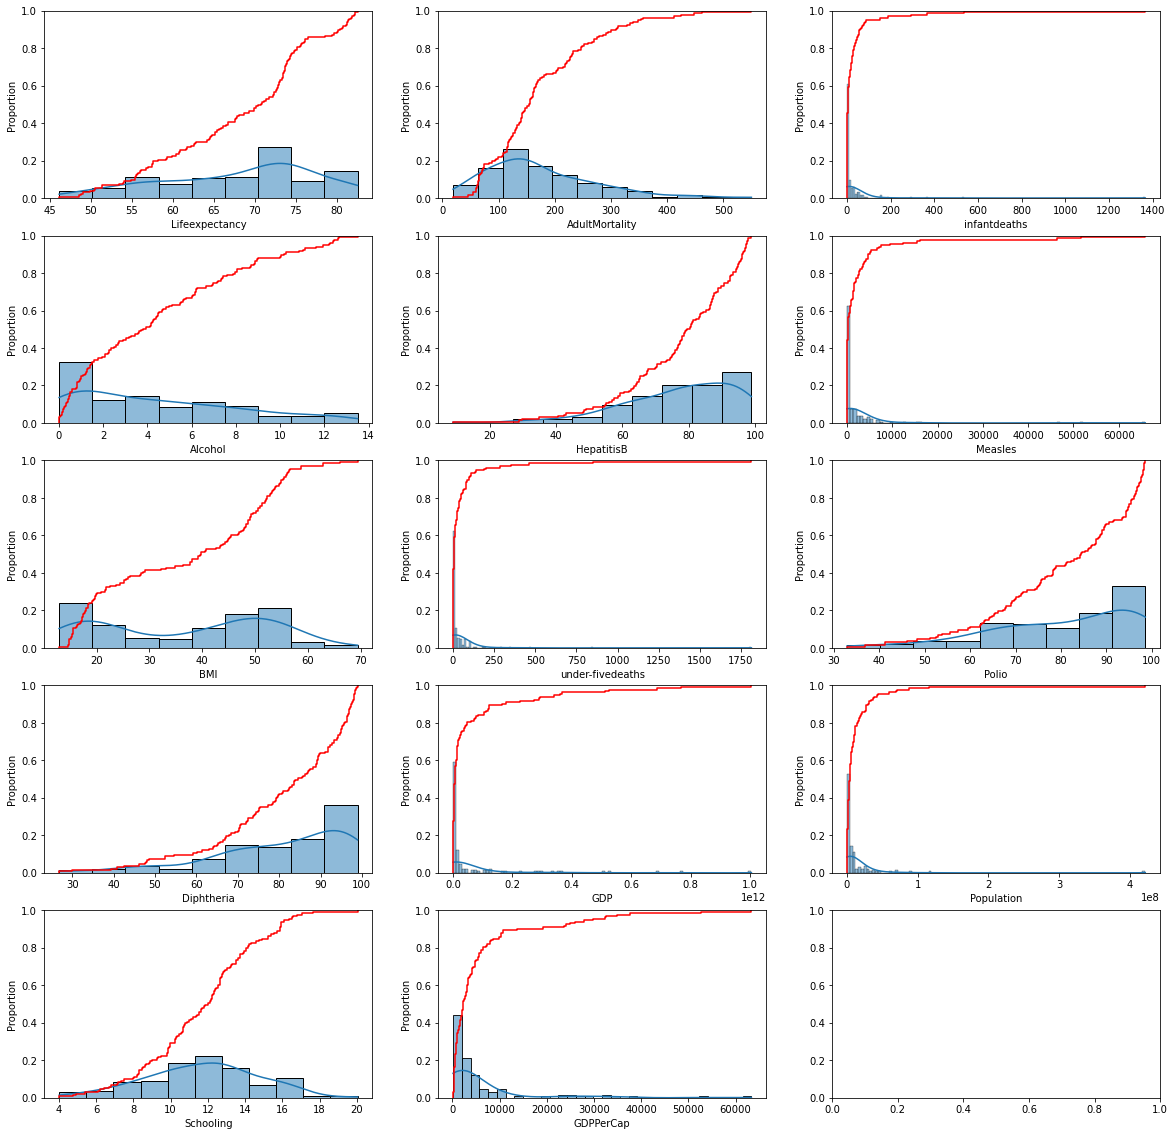

In [4]:
#Print all distributions
numberOfColumns = 3
# this should give us the correct number of rows needed to fit all the columns 3 per row
numberOfRows = (len(dfLE.drop(columns={"Country","isDeveloped"}).columns)//3) + (0 if (len(dfLE.drop(columns={"Country","isDeveloped"}).columns)%3) == 0 else 1)
fig, axes = plt.subplots(nrows=numberOfRows, ncols=numberOfColumns)
# take out Country and isDeveloped as they don't really provide anp valueable information.
for i, column in enumerate(dfLE.drop(columns={"Country","isDeveloped"}).columns):
    sns.histplot(dfLE[column], ax=axes[i//numberOfColumns, i%numberOfColumns], stat="proportion", kde=True)
    sns.ecdfplot(data=dfLE[column], ax=axes[i//numberOfColumns, i%numberOfColumns], color="red")

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

## Schooling appropriate distribution
Schooling in the histogram above looks reasonably normal, let's test for it 

In [5]:
#Analytical for Schooling
k2, p = ss.normaltest(dfLE["Schooling"])
print("p value is ", p)

p value is  0.8061408621435778


Our p Value is .80 we cannot reject the null hypothesis that our data is normally distributed. Now we'll make ourselves a normal analytical distribution.
## Analytical (Red) vs Empirical(Blue) Visualization

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

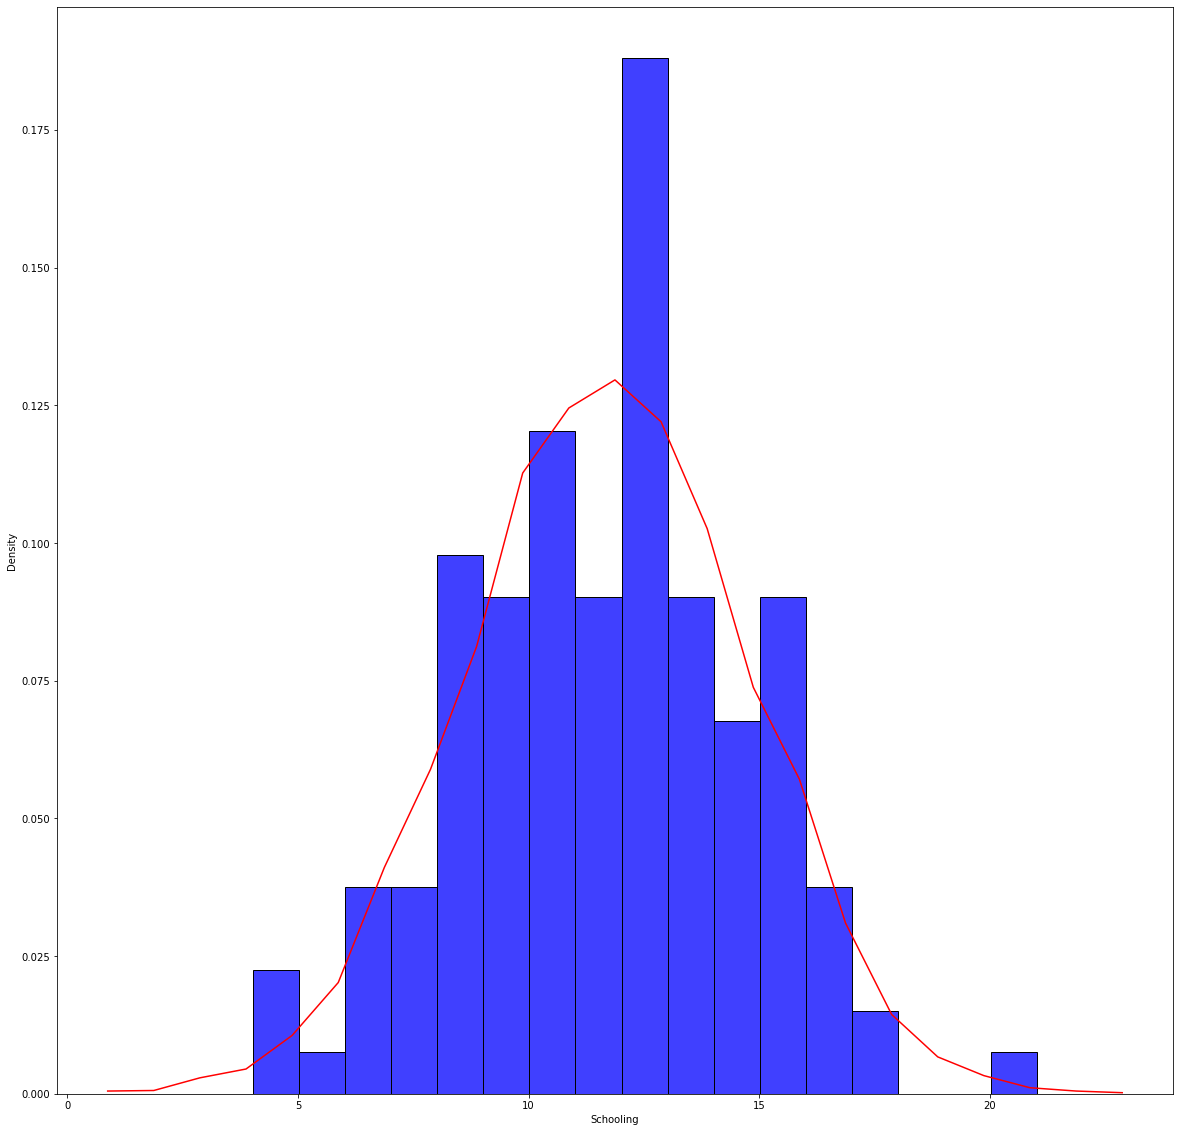

In [6]:
schoolin_mu = dfLE["Schooling"].mean()
schoolin_sigma = dfLE["Schooling"].std()
schoolin_normies = ss.norm(schoolin_mu,schoolin_sigma)
sns.histplot(data=schoolin_normies.rvs(10000), binwidth=1, color="red", stat="density", element="poly", fill=False)
sns.histplot(data=dfLE["Schooling"], binwidth=1, color="blue", stat="density")

## 5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

In [7]:
# What is Canada's school level?
canIndex = dfLE.index[dfLE["Country"] == "Canada"]
# getting the index took me way too fricking long, like should have my computer privledges revoked long
canada_schoolin = dfLE.loc[canIndex.values[0], "Schooling"]
print("Canada has ",canada_schoolin,"years of schooling")

aroundCandaPrediction = schoolin_normies.cdf(canada_schoolin + 1) - schoolin_normies.cdf(canada_schoolin - 1)

print("According to scipy",np.round(aroundCandaPrediction,2), "% of countries have a schooling level within 1 year of Canada.")
# why did you not make it worth points to check our answer!? now I'm compelled to do it and I won't even get marks for it
schoolEmpCdf = thinkstats2.Cdf(dfLE["Schooling"])
aroundCanada = schoolEmpCdf.PercentileRank(canada_schoolin + 1) - schoolEmpCdf.PercentileRank(canada_schoolin - 1)
print("Accccctually:", np.round(aroundCanada,2),"%")

Canada has  15.875 years of schooling
According to scipy 0.1 % of countries have a schooling level within 1 year of Canada.
Accccctually: 13.53 %


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

<AxesSubplot:xlabel='GDPPerCap', ylabel='Proportion'>

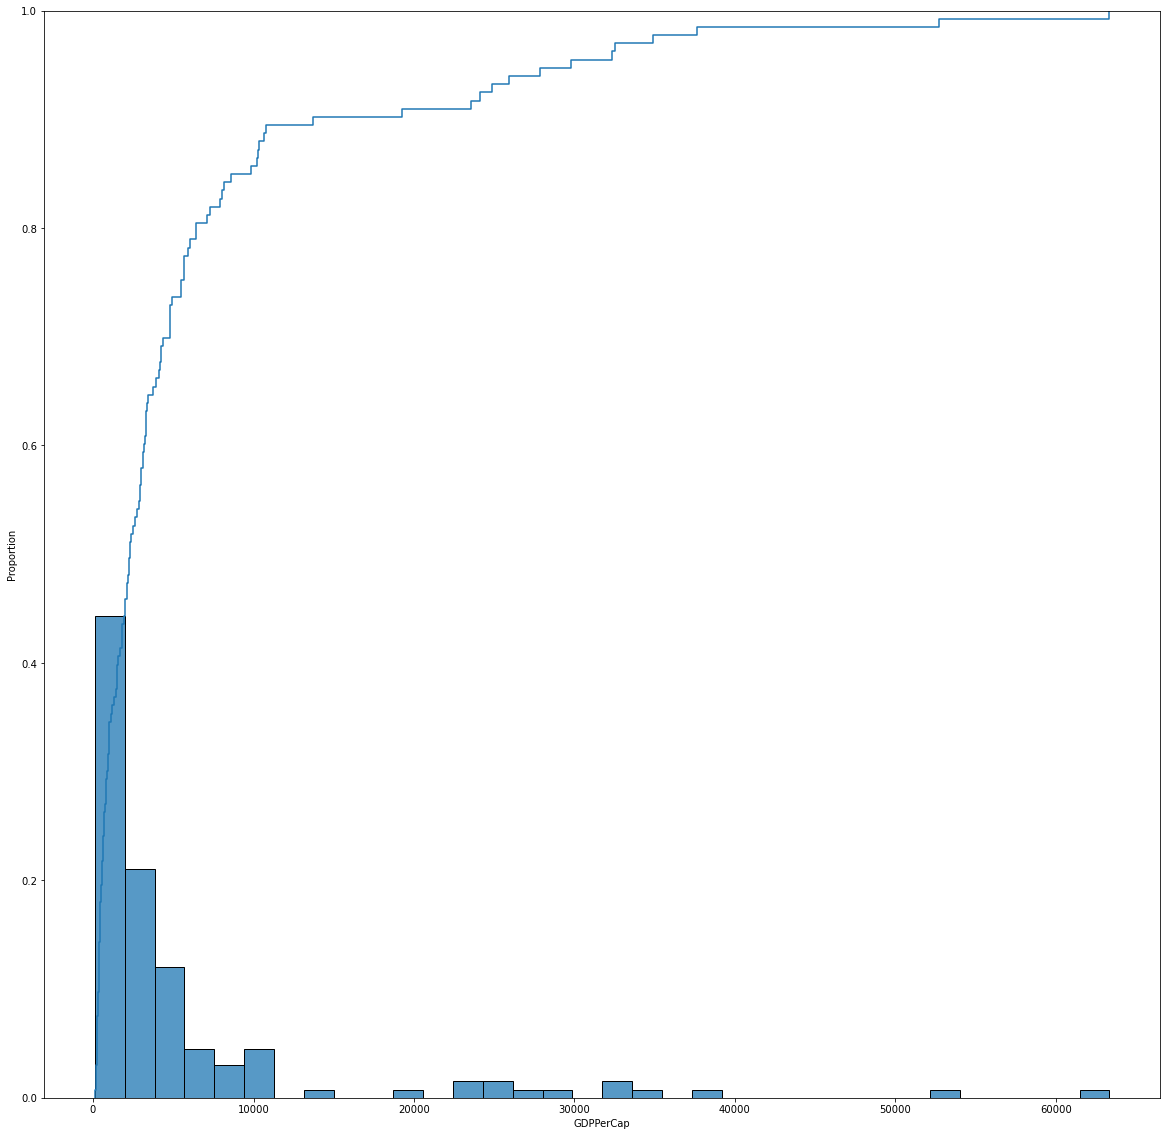

In [8]:
#Analytical for GDP/capita
#What does it look like again?
sns.ecdfplot(dfLE["GDPPerCap"])
sns.histplot(dfLE["GDPPerCap"], stat="proportion")

## That looks exponontial
let's see what a chart with a exponetial analytical distribution looks like

<AxesSubplot:xlabel='GDPPerCap', ylabel='Proportion'>

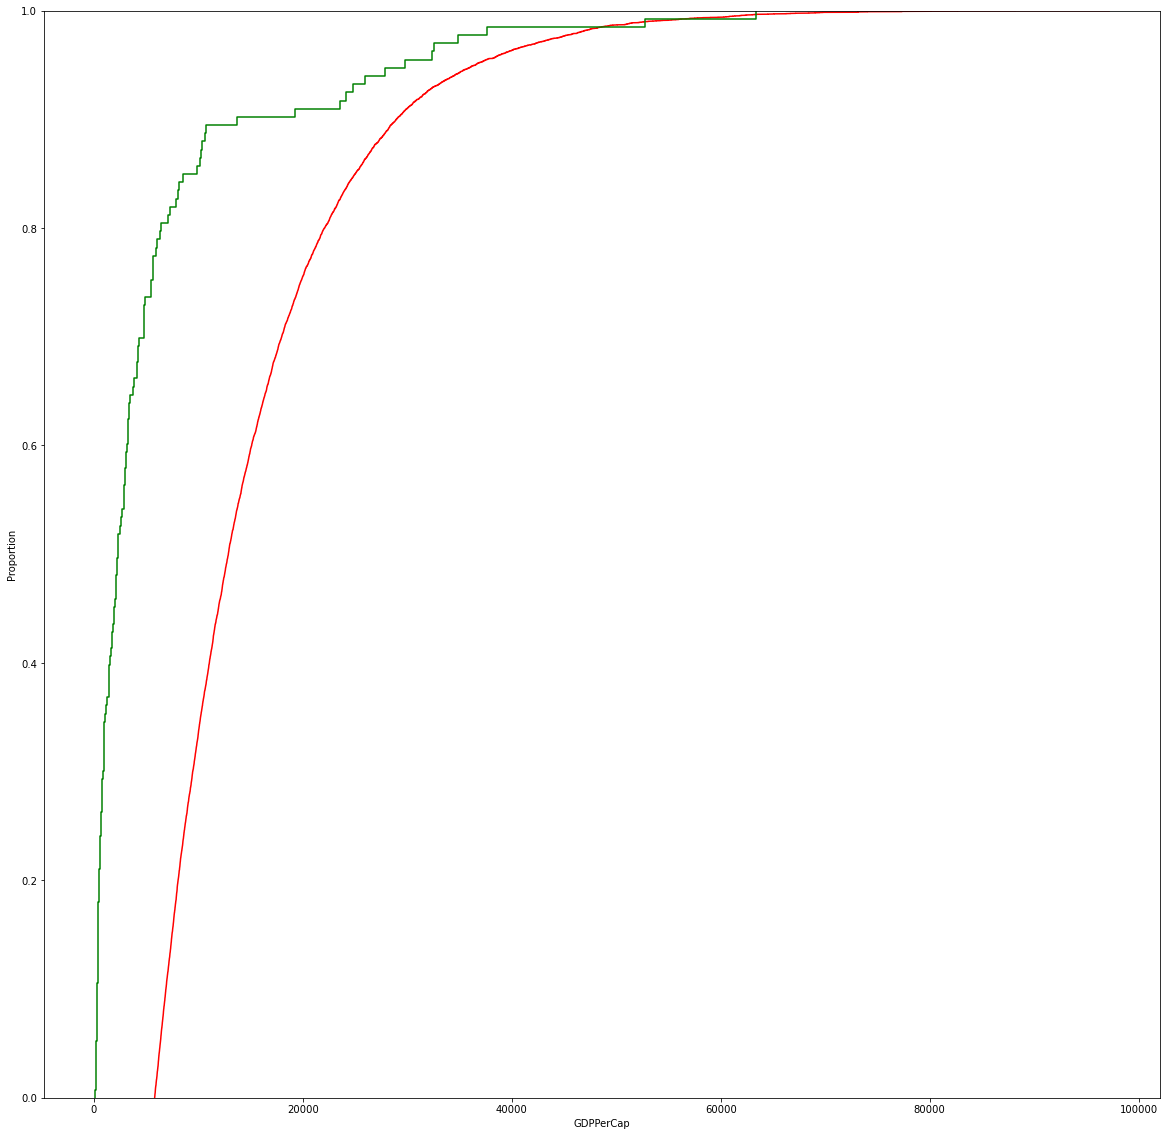

In [9]:
analyticalExpo = ss.expon(scale=np.std(dfLE["GDPPerCap"]), loc=np.mean(dfLE["GDPPerCap"]))
sns.ecdfplot(analyticalExpo.rvs(10000), color="red")
sns.ecdfplot(dfLE["GDPPerCap"], color="Green")

## 5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?

- outlier hints?
- ^^^huh!!!

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

## Filters
 1. Removed the `Country` column it is not numerical data and doesn't provide anything valueable to the pair plot.
 1. Removed `under-fivedeaths` and `infantdeaths` that were above 250, as that got rid of a few big outliers which were draging the mean too high
 1. Removed `Population` that were above 60 000 000
 1. Removed all NaN so because it is not a value and won't compare easily.

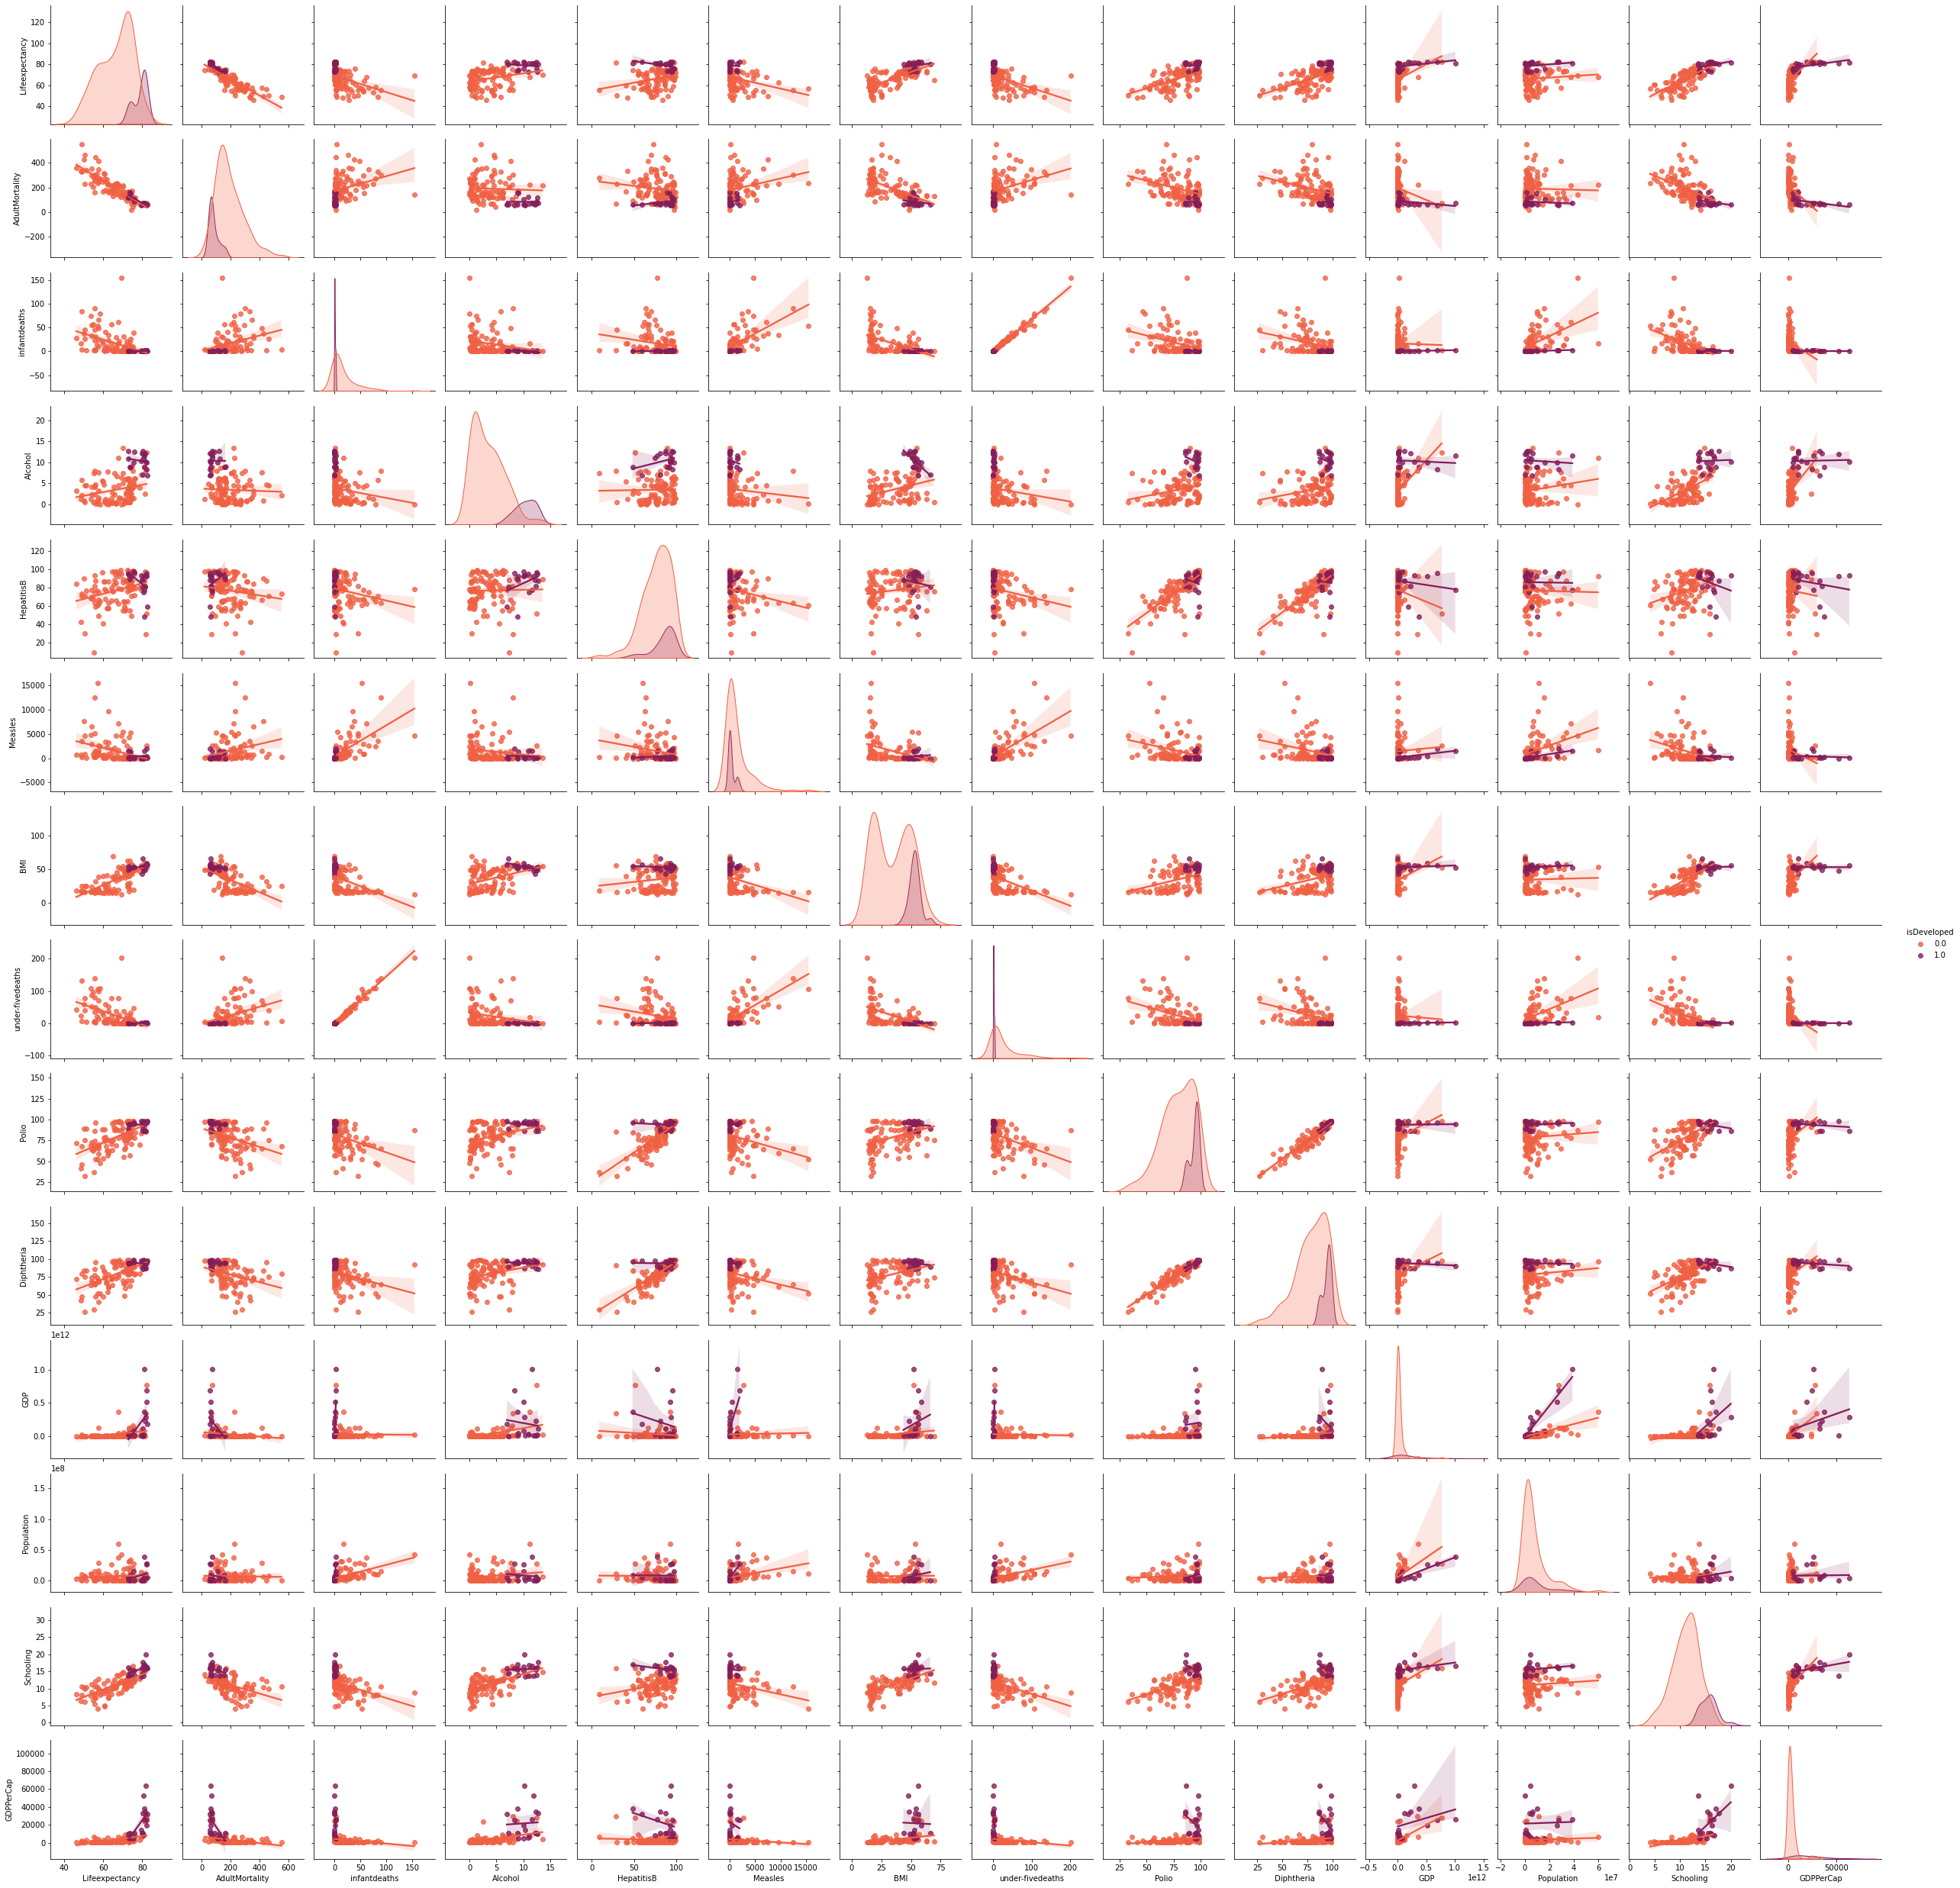

In [10]:
#Visualize correlations. 
# remove infant deaths and under five deaths above 250
dfLE = dfLE[dfLE["infantdeaths"] < 250]
dfLE = dfLE[dfLE["under-fivedeaths"] < 250]

dfLE = dfLE[dfLE["Population"] < 60000000]
sns.pairplot(dfLE.drop(columns=["Country"]), dropna=True, hue="isDeveloped", palette=sns.color_palette("rocket_r", n_colors=2), kind="reg")

## Heatmap of Developed correlations

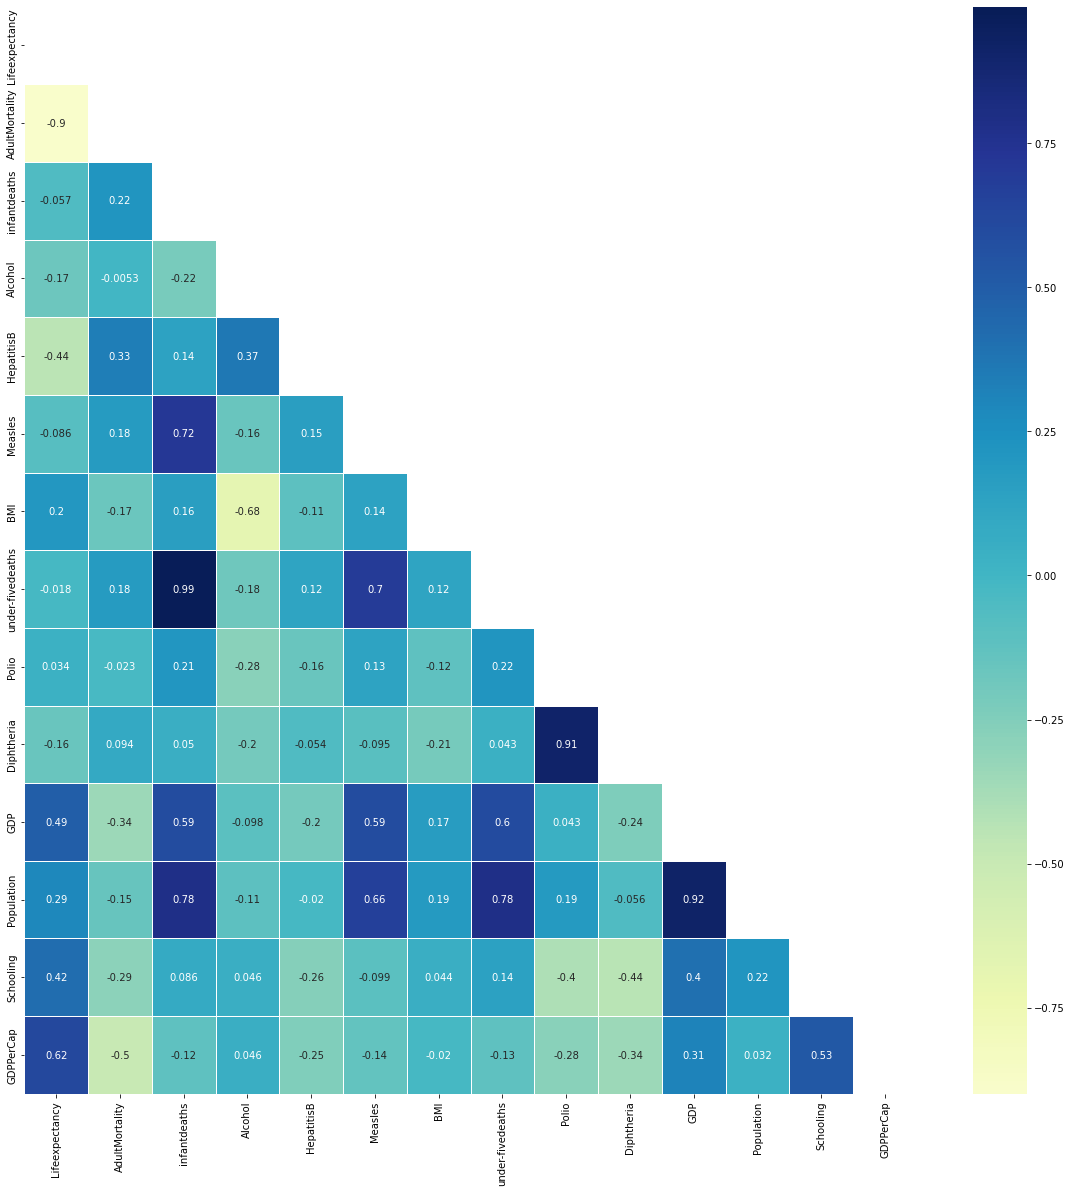

In [11]:
#do a heatmap for giggles
dfcorrs = dfLE.apply(pd.to_numeric, errors="coerce")
dfcorrsDev = dfcorrs.drop(columns=["Country"])
dfcorrsDev = dfcorrsDev[dfcorrsDev["isDeveloped"] == 1]
dfcorrsDev = dfcorrsDev.drop(columns="isDeveloped").corr()
mask = np.triu(np.ones_like(dfcorrsDev, dtype=bool))
sns.heatmap(dfcorrsDev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Heatmap of Not Developed Correlations

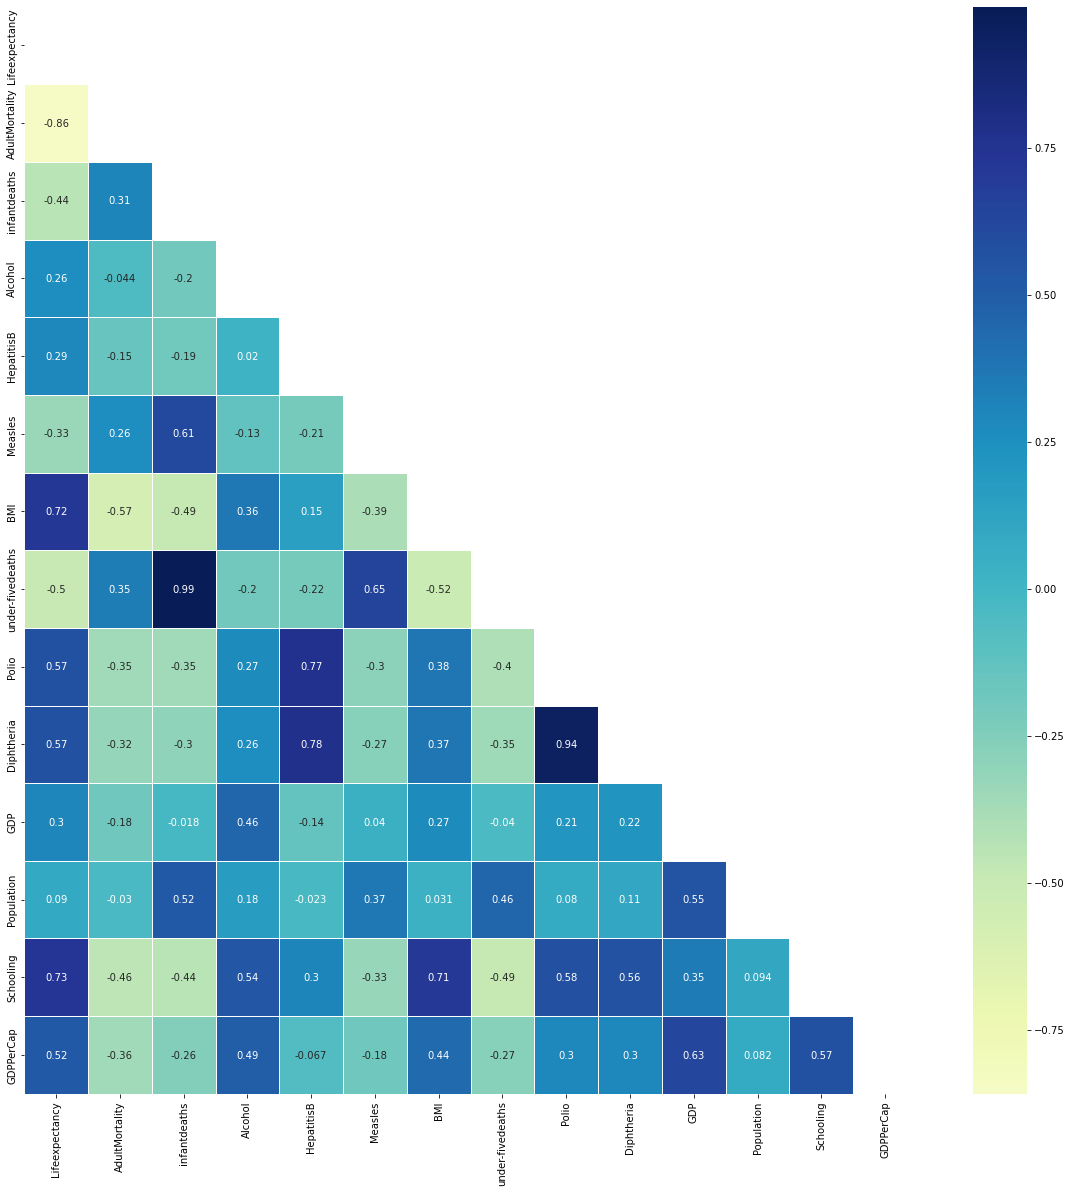

In [12]:
dfcorrsNotDev = dfcorrs.drop(columns=["Country"])
dfcorrsNotDev = dfcorrsNotDev[dfcorrsNotDev["isDeveloped"] == 0]
dfcorrsNotDev = dfcorrsNotDev.drop(columns="isDeveloped").corr()
mask = np.triu(np.ones_like(dfcorrsNotDev, dtype=bool))
sns.heatmap(dfcorrsNotDev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Standout from the pair plot and heatmap are diptheria-polio & life expectancy-schooling
Let us look at them more closely
### Diptheria vs Polio

<AxesSubplot:xlabel='Polio', ylabel='Diphtheria'>

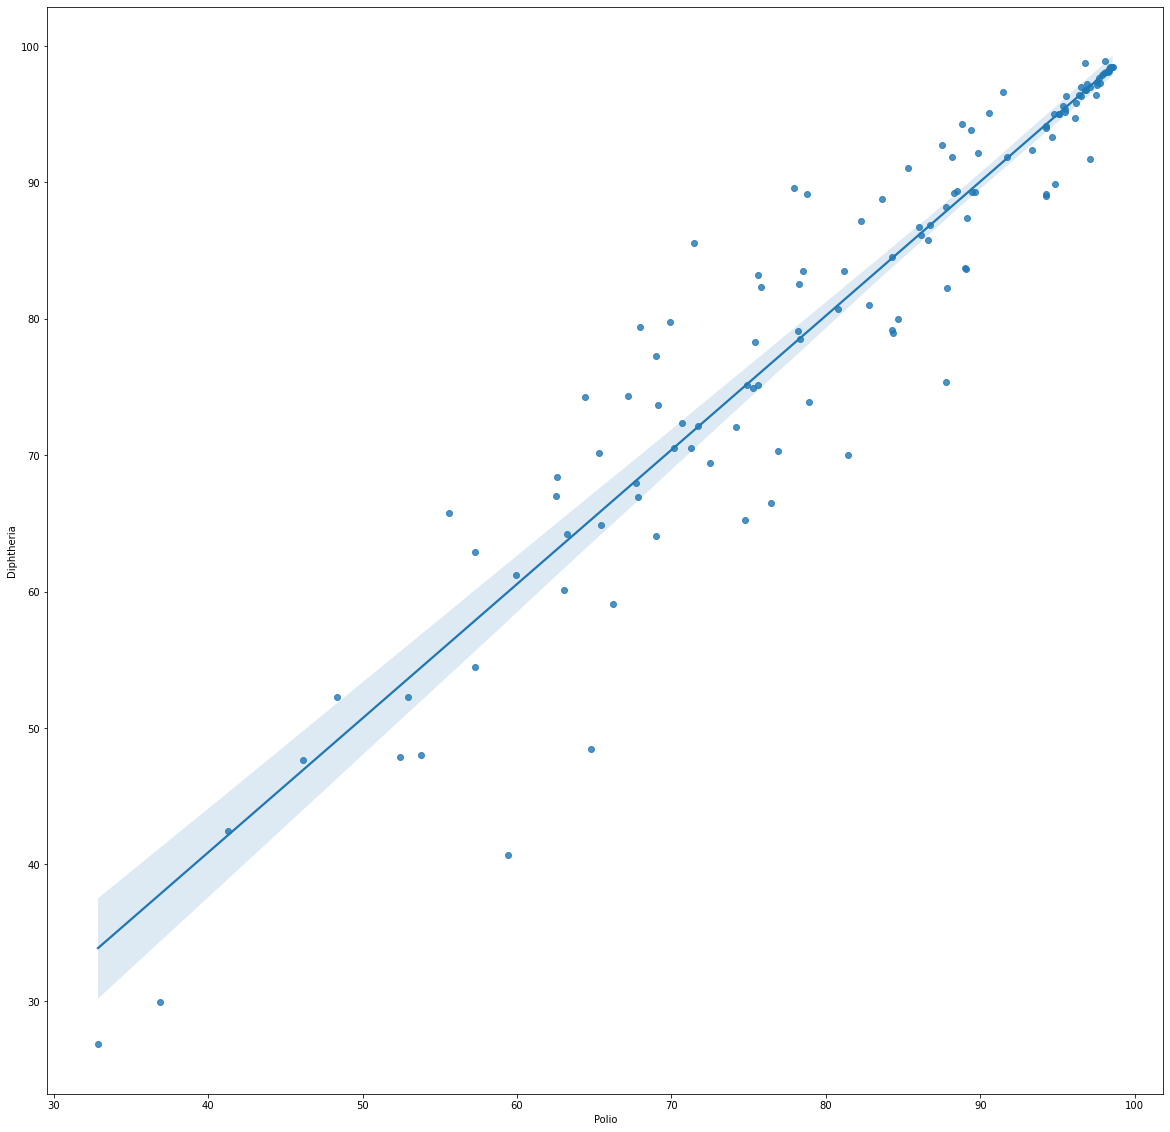

In [13]:
dfDipPol = dfLE[["Polio", "Diphtheria"]]
sns.regplot(x=dfDipPol["Polio"], y=dfDipPol["Diphtheria"], robust=True)

### life expectancy-schooling
judging by the pair plot I'm going to ignore the developed countries because they look like they don't have a very good correlation here

<AxesSubplot:xlabel='Schooling', ylabel='Lifeexpectancy'>

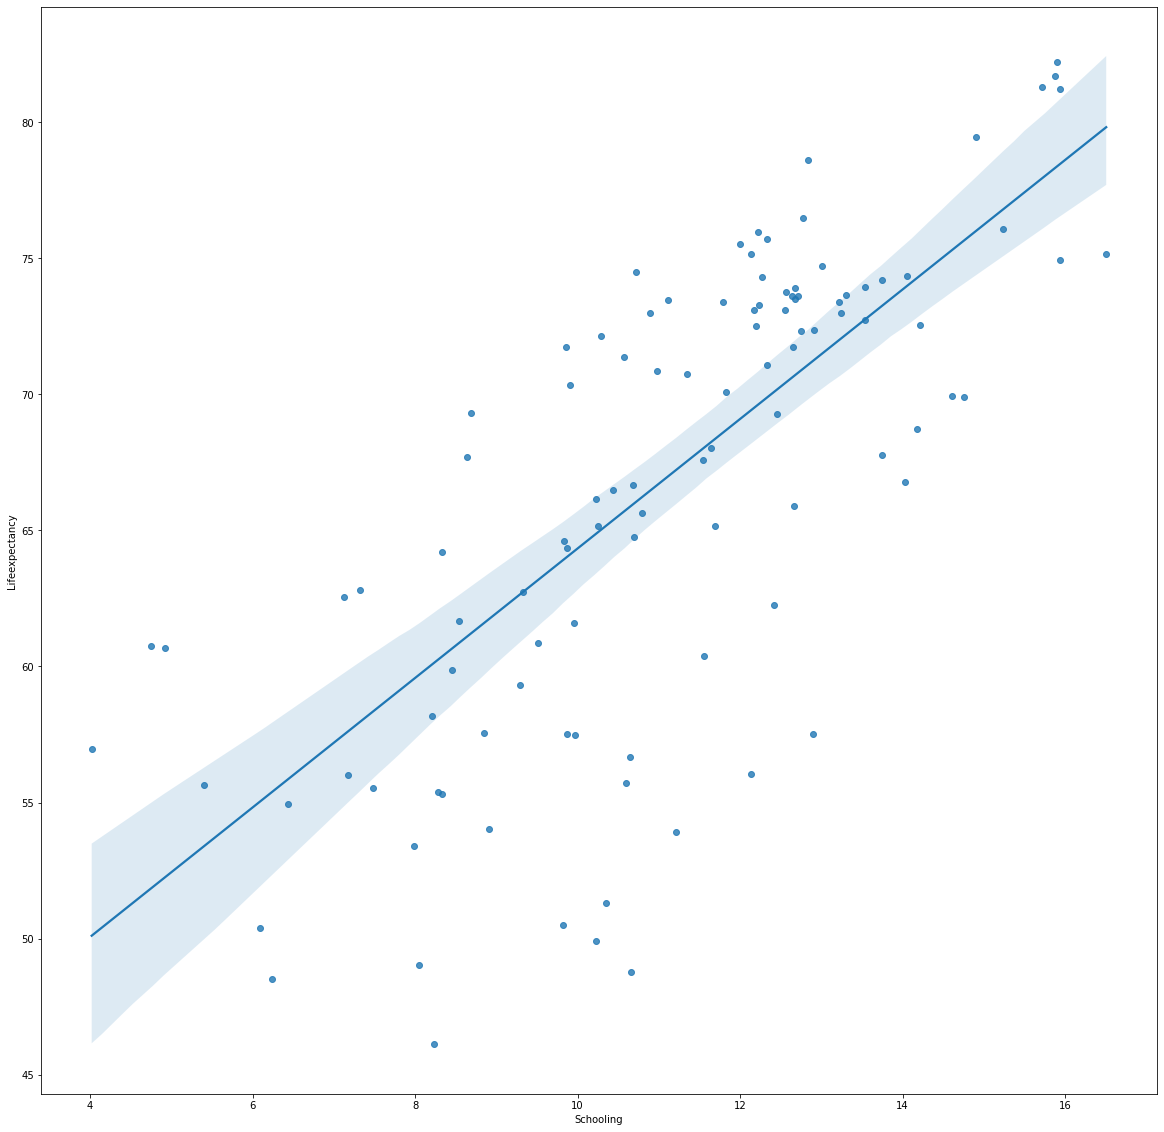

In [14]:
dfNoDeveloped = dfLE[dfLE["isDeveloped"] == 0]
sns.regplot(x=dfNoDeveloped["Schooling"], y=dfNoDeveloped["Lifeexpectancy"], robust=True)

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

## Heatmap of Developed correlations

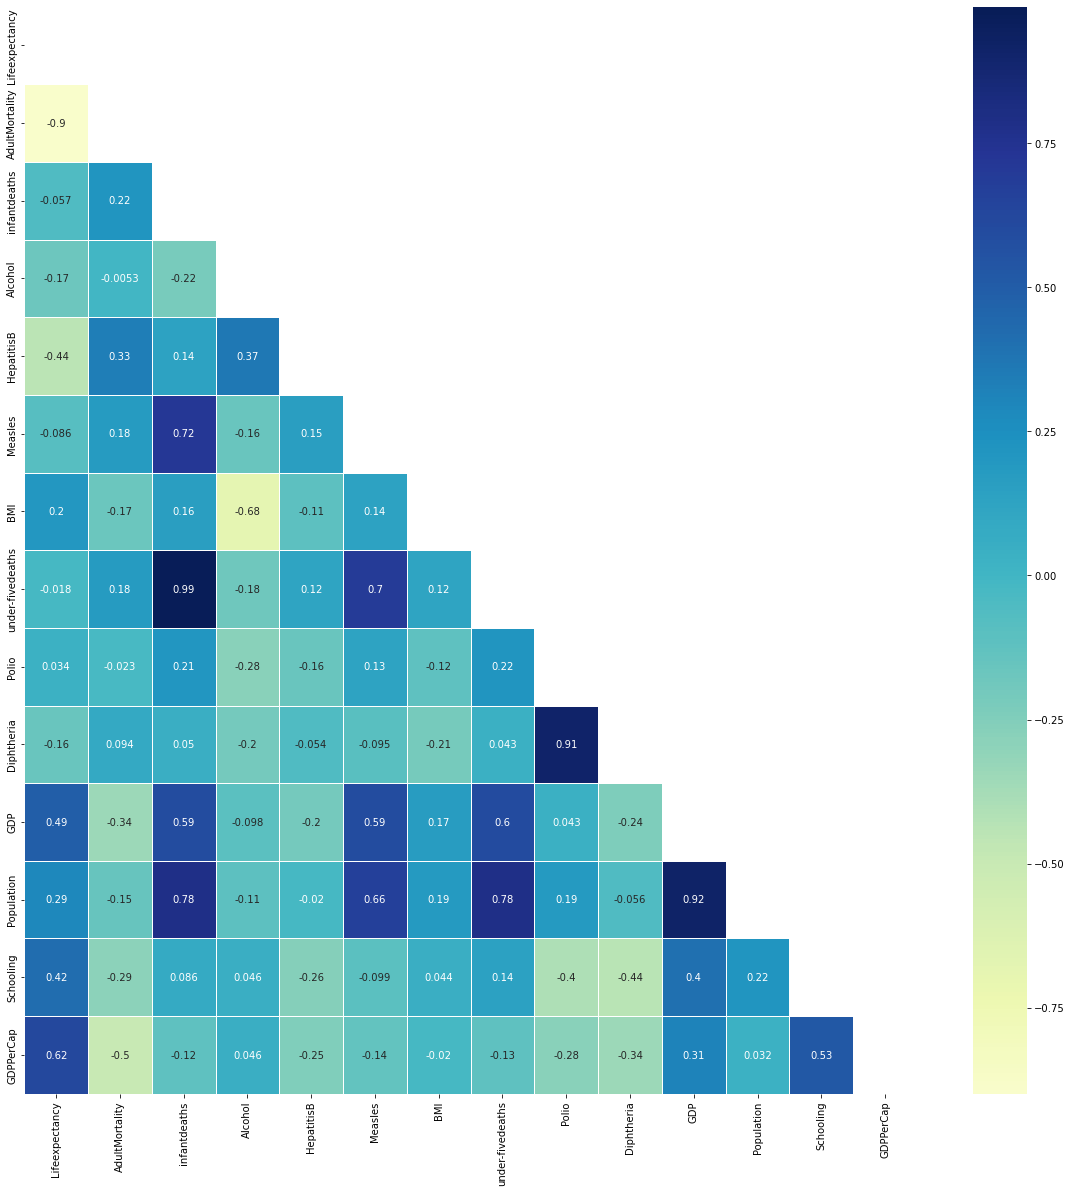

In [15]:
# we did this above so we'll just reuse our plotting code
sns.heatmap(dfcorrsDev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Thinkstats Corr and SpearmanCorr

In [20]:
# heat map says these three are the biggest
dfDeveloped = dfLE[dfLE["isDeveloped"] == 1]
print("For life expectancy vs Hepatitis B - Corr:", thinkstats2.Corr(dfDeveloped["Lifeexpectancy"], dfDeveloped["HepatitisB"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfDeveloped["Lifeexpectancy"], dfDeveloped["HepatitisB"]))
print("For life expectancy vs GDP - Corr:", thinkstats2.Corr(dfDeveloped["Lifeexpectancy"], dfDeveloped["GDP"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfDeveloped["Lifeexpectancy"], dfDeveloped["GDP"]))
print("For life expectancy vs Adult mortality - Corr:", thinkstats2.Corr(dfDeveloped["Lifeexpectancy"], dfDeveloped["AdultMortality"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfDeveloped["Lifeexpectancy"], dfDeveloped["AdultMortality"]))

For life expectancy vs Hepatitis B - Corr: -0.44469460051415044 SpearmanCorr: -0.3859649122807018
For life expectancy vs GDP - Corr: 0.49059621079562193 SpearmanCorr: 0.6350877192982457
For life expectancy vs Adult mortality - Corr: -0.8993592069981189 SpearmanCorr: -0.6701754385964912


In developed countrys the three strongest correlations of LifeExpectancy are
 1. Hepatitis B: -0.44
 1. GDP: 0.49
 1. AdultMortality: -0.9

### 10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
I think the obvious causal relationship is as adult martality goes down life expectancy goes up.

GDP going up as life expectancy goes up seems to be universally acknowledged as true. If there is a causal relationship I suspect GDP is probably the cause and life expectancy is the effect. I don't think it's truly causal, I think there are confounding factors, like rich countries being able to pay for better healthcare.

You need your liver, if Hep B destroys it, you're probably going to die. I can see Hep B infections going down being correlated with longer life expectancy.

Over all these are reasonably supported in reality.

## Heatmap of not developed correlations

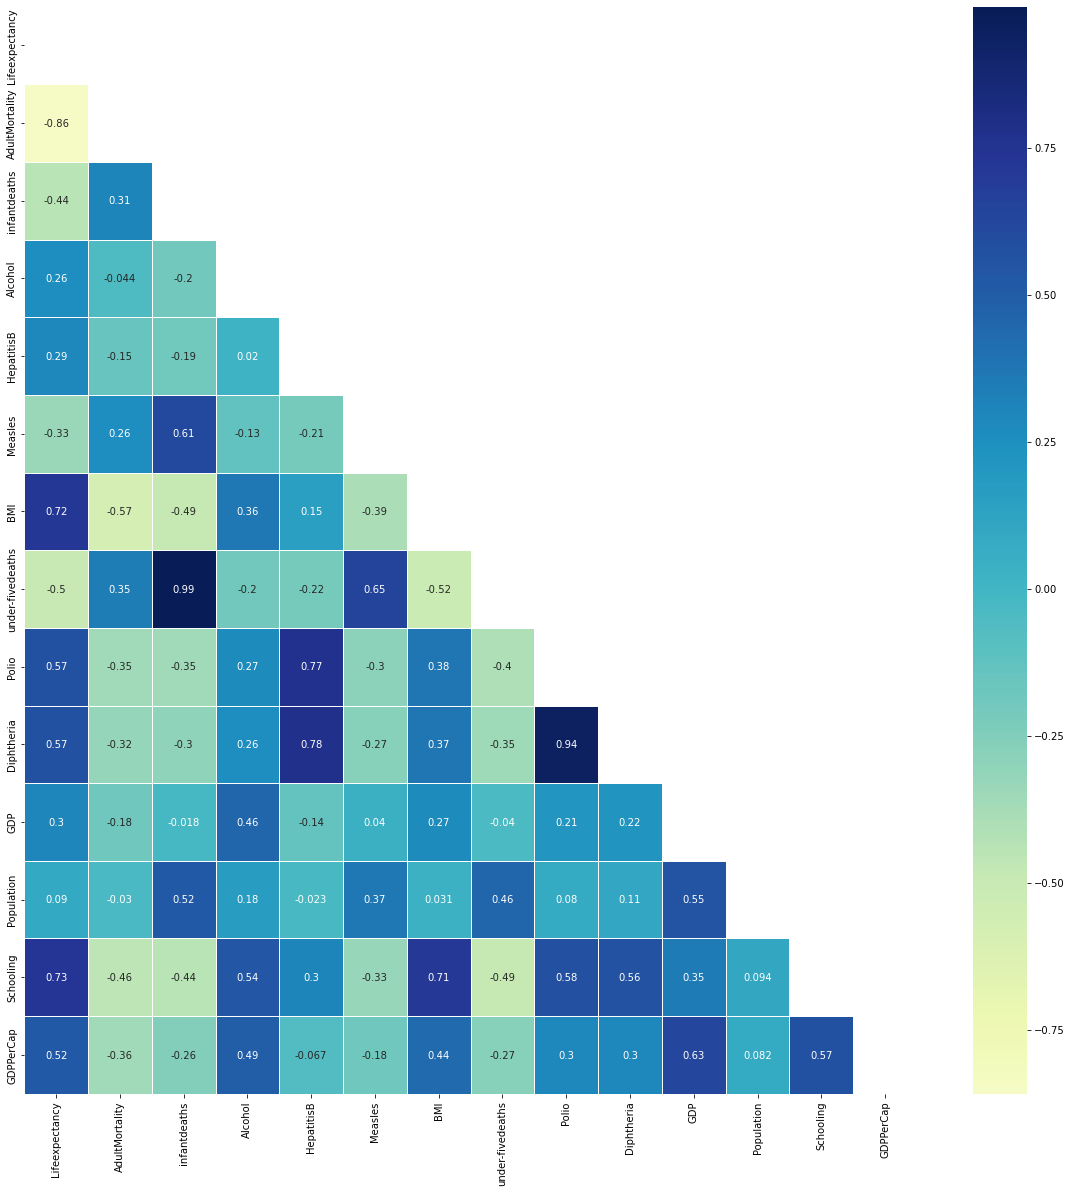

In [19]:
sns.heatmap(dfcorrsNotDev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Thinkstats Corr and Spearman Corr

In [22]:
# heat map says these three are the biggest
print("For life expectancy vs Schooling - Corr:", thinkstats2.Corr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["Schooling"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["Schooling"]))
print("For life expectancy vs BMI - Corr:", thinkstats2.Corr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["BMI"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["BMI"]))
print("For life expectancy vs Adult mortality - Corr:", thinkstats2.Corr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["AdultMortality"]), "SpearmanCorr:", thinkstats2.SpearmanCorr(dfNoDeveloped["Lifeexpectancy"], dfNoDeveloped["AdultMortality"]))

For life expectancy vs Schooling - Corr: 0.72762889459111 SpearmanCorr: 0.7611234793973801
For life expectancy vs BMI - Corr: 0.7193417080565508 SpearmanCorr: 0.7276694856298042
For life expectancy vs Adult mortality - Corr: -0.8592209072611506 SpearmanCorr: -0.8923339921721893


In not developed countrys the three strongest correlations of LifeExpectancy are
 1. Schooling: 0.73
 1. BMI: 0.72
 1. AdultMortality: -0.9

### 10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
I think the obvious causal relationship is as adult martality goes down life expectancy goes up.

I suspect in poorer countries where food insecurity is high, having a larger BMI means you are not experiencing big food insecurity. With available food comes longer lives.

If I had to guess, better educated countries have more money and thus better healthcare and longer lives. Schooling may also contribute to educating people about health (don't smoke, eat some veggies, etc.) which may also help drive the life expectancy higher. Another possibility would be that better educated countries probably have lower violent crime rates, meaning less deaths at young ages.

## 10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?